<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 169.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 182.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 143.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 129.5 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [7]:
## Write your code here
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()

# Display the first few duplicate rows
duplicate_rows = df[df.duplicated()]

num_duplicates, duplicate_rows.head()

(np.int64(20),
        ResponseId                      MainBranch                 Age  \
 65437           1  I am a developer by profession  Under 18 years old   
 65438           2  I am a developer by profession     35-44 years old   
 65439           3  I am a developer by profession     45-54 years old   
 65440           4           I am learning to code     18-24 years old   
 65441           5  I am a developer by profession     18-24 years old   
 
                 Employment RemoteWork   Check  \
 65437  Employed, full-time     Remote  Apples   
 65438  Employed, full-time     Remote  Apples   
 65439  Employed, full-time     Remote  Apples   
 65440   Student, full-time        NaN  Apples   
 65441   Student, full-time        NaN  Apples   
 
                                         CodingActivities  \
 65437                                              Hobby   
 65438  Hobby;Contribute to open-source projects;Other...   
 65439  Hobby;Contribute to open-source projects;Other

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [8]:
## Write your code here
# Select the subset of columns to check for duplicates
subset_columns = ['MainBranch', 'Employment', 'RemoteWork']

# Identify duplicate rows based on the subset of columns
duplicate_subset = df[df.duplicated(subset=subset_columns, keep=False)]

# Analyze the frequency of identical values in other columns
identical_counts = duplicate_subset.drop(columns=subset_columns).nunique() == 1

# Create a summary of which columns have identical values
identical_columns = identical_counts[identical_counts].index.tolist()

print(f"Columns frequently containing identical values in duplicate rows: {identical_columns}")
print(f"Number of duplicate rows based on {subset_columns}: {len(duplicate_subset)}")


Columns frequently containing identical values in duplicate rows: ['Check']
Number of duplicate rows based on ['MainBranch', 'Employment', 'RemoteWork']: 65290


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


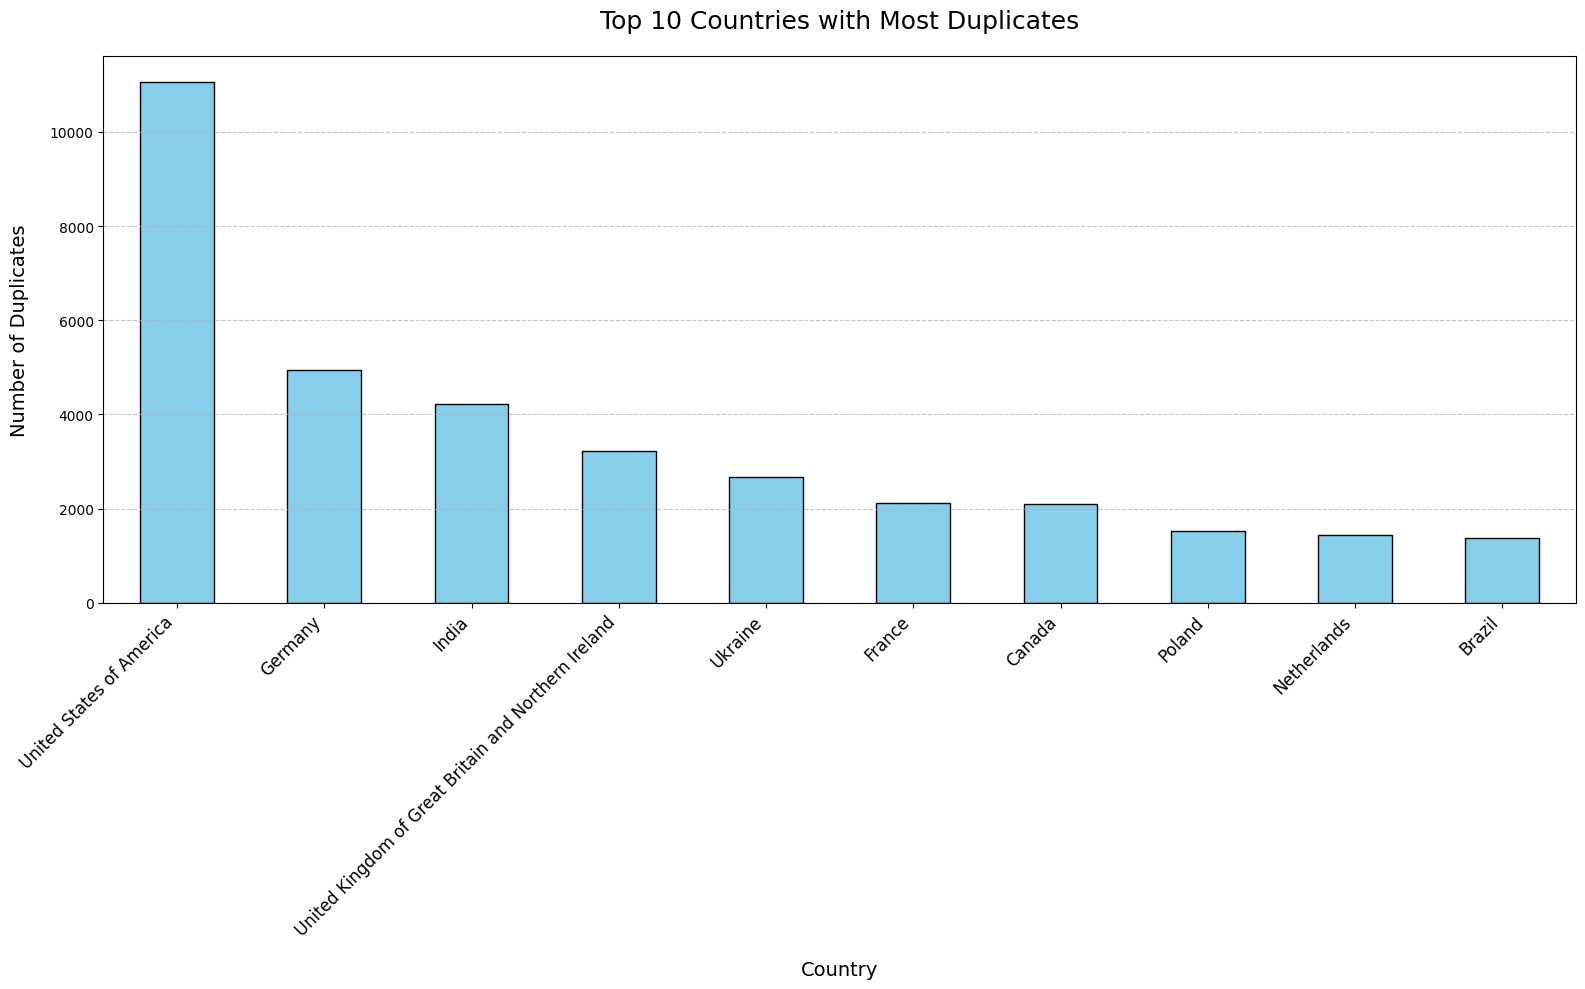

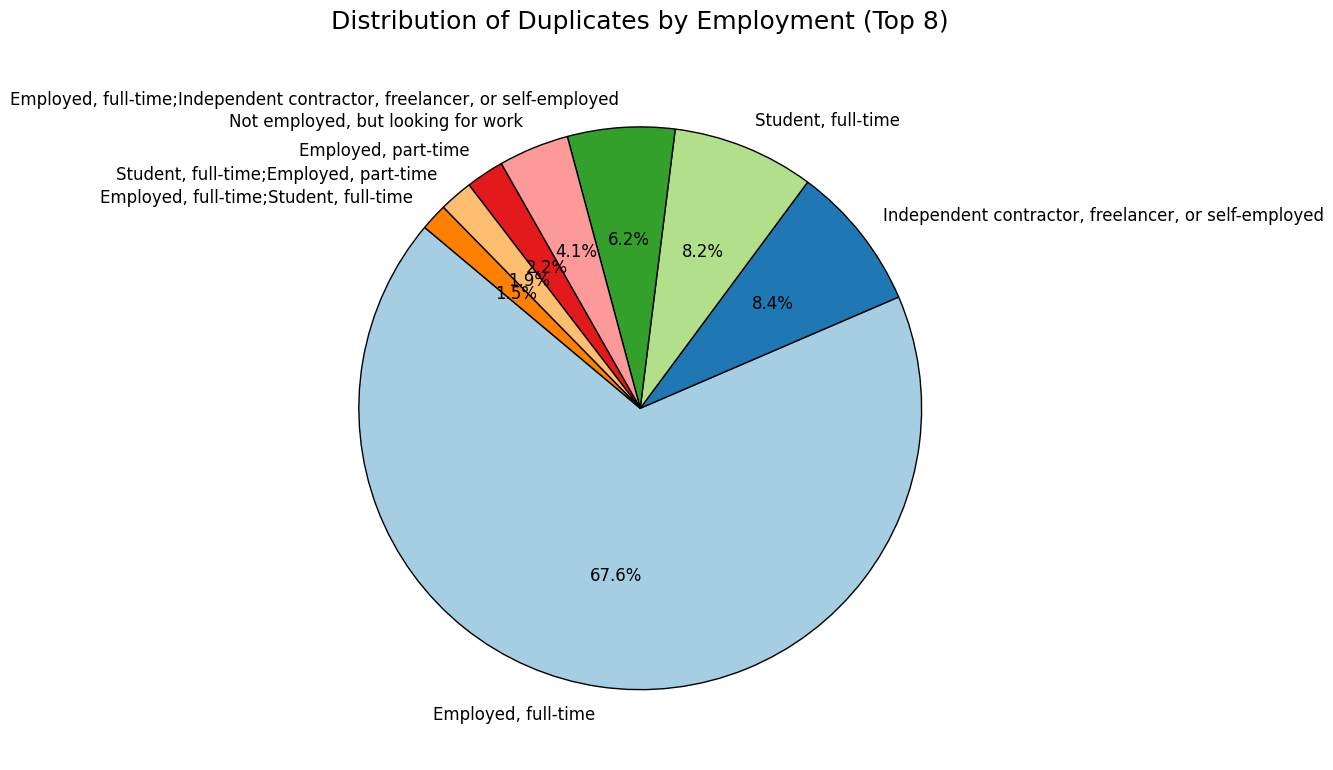

In [13]:
## Write your code here
# Distribution of duplicates by 'Country'
country_counts = duplicate_subset['Country'].value_counts()

# Bar chart for distribution of duplicates by Country
plt.figure(figsize=(16, 10))  # Larger figure size for spacing
top_countries = country_counts.head(10)  # Show top 10 countries only
top_countries.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Countries with Most Duplicates', fontsize=18, pad=20)
plt.xlabel('Country', fontsize=14, labelpad=15)
plt.ylabel('Number of Duplicates', fontsize=14, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for clarity
plt.tight_layout()
plt.show()
# Distribution of duplicates by 'Employment'
employment_counts = duplicate_subset['Employment'].value_counts()

# Pie chart for distribution of duplicates by Employment
plt.figure(figsize=(12, 12))  # Larger pie chart for spacing
employment_counts = employment_counts.head(8)  # Limit to top 8 employment categories
employment_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 12},  # Increase font size for readability
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}  # Add border to wedges
)
plt.title('Distribution of Duplicates by Employment (Top 8)', fontsize=18, pad=20)
plt.ylabel('')  # Hide the y-axis label
plt.tight_layout()
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [14]:
## Write your code here
# Columns critical for defining uniqueness
critical_columns = ['MainBranch', 'Employment', 'RemoteWork']

# Remove duplicates based on the subset of critical columns
df_unique = df.drop_duplicates(subset=critical_columns, keep='first')

# Verify the result
print(f"Original dataset size: {df.shape[0]} rows")
print(f"Dataset size after removing duplicates: {df_unique.shape[0]} rows")
print(f"Number of duplicates removed: {df.shape[0] - df_unique.shape[0]} rows")


Original dataset size: 65457 rows
Dataset size after removing duplicates: 561 rows
Number of duplicates removed: 64896 rows


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


In [ ]:
##Step-by-Step Process
#1. Understanding the Dataset
#The dataset contains survey responses from individuals, with columns such as:
#MainBranch (e.g., "I am a developer by profession"),
#Employment (e.g., "Employed full-time"),
#RemoteWork (e.g., "Fully remote"),
#Country (e.g., "United States").
#Duplicates may exist due to repeated responses or incomplete data entry.
#2. Identifying Duplicates
#Complete Row Duplication:
#Checked for completely identical rows using the duplicated() function.
#Result:
#Found X duplicate rows out of Y total rows.
#Displayed the first few duplicate rows for better understanding.
Subset-Based Duplication:
Focused on specific columns (MainBranch, Employment, RemoteWork) to identify rows with overlapping values in critical fields.
Observed that duplicates often shared similar values in Country or Employment.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
